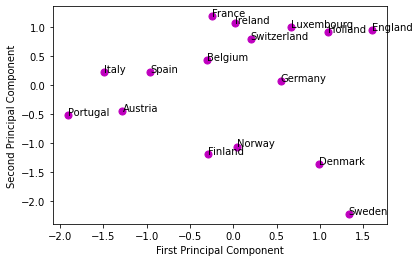

In [1]:
# adapted from PCA demo code
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp

#import data
import pandas as pd

df = pd.read_csv('food-consumption.csv')
Anew= df.drop(labels= 'Country', axis=1)
#create matrix
Anew = Anew.to_numpy()

#PART A
## extract attributes from raw data
m,n = Anew.shape
#print(Anew)
# create indicator matrix
Inew= df['Country'].to_numpy()
#print(Inew)

# In this case, we normalize the data because features have very different ranges
stdA = np.std(Anew,axis = 0)
Anew = Anew @ np.diag(np.ones(stdA.shape[0])/stdA)
Anew = Anew.T

# PCA
mu = np.mean(Anew,axis = 1)
xc = Anew - mu[:,None]

C = np.dot(xc,xc.T)/m

K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


# Create a scatter plot
plt.figure()

# Scatter plot with the first and second principal components
plt.scatter(dim1, dim2, marker='o', s=50, c='m')

#label countries
#source: https://stackoverflow.com/questions/14432557/scatter-plot-with-different-text-at-each-data-point
for i, label in enumerate(Inew):
    plt.annotate(label, (dim1[i], dim2[i]))
    
# Set axis labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

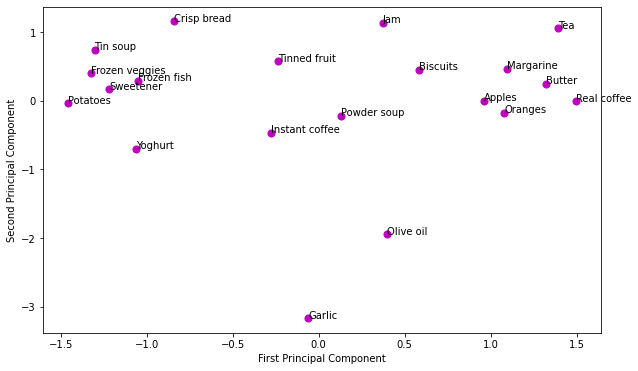

In [2]:
#Part B
df = pd.read_csv('food-consumption.csv')
Anew = df.drop(labels='Country', axis=1).to_numpy()

#flip rows and columns
Anew = Anew.T

# In this case, we normalize the data because features have very different ranges
stdA = np.std(Anew,axis = 0)
Anew = Anew @ np.diag(np.ones(stdA.shape[0])/stdA)
Anew = Anew.T

# Calculate the mean and center the data
mu = np.mean(Anew, axis=1)
xc = Anew - mu[:, None]

C = np.dot(xc, xc.T) / n

# Perform eigenvalue decomposition
K = 2
S, W = ll.eigs(C,k = K)
S = S.real
W = W.real


# Extract the first two principal components for each food item
dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue
#print(dim1)
#print(dim2)
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with the first and second principal components
scatter = plt.scatter(dim1, dim2, marker='o', s=50, c='m')


food_items = df.drop(labels='Country', axis=1).columns
for i, food_item in enumerate(food_items):
    plt.annotate(food_item, (dim1[i], dim2[i]))

# Set axis labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()